# RANDOM FOREST REGRESSION (on Position_Salary.csv)

Use of Random forest reduce risk of overlifting as it is based on multiple regression trees

C:\Users\Al-Rehman COMputers\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Al-Rehman COMputers\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


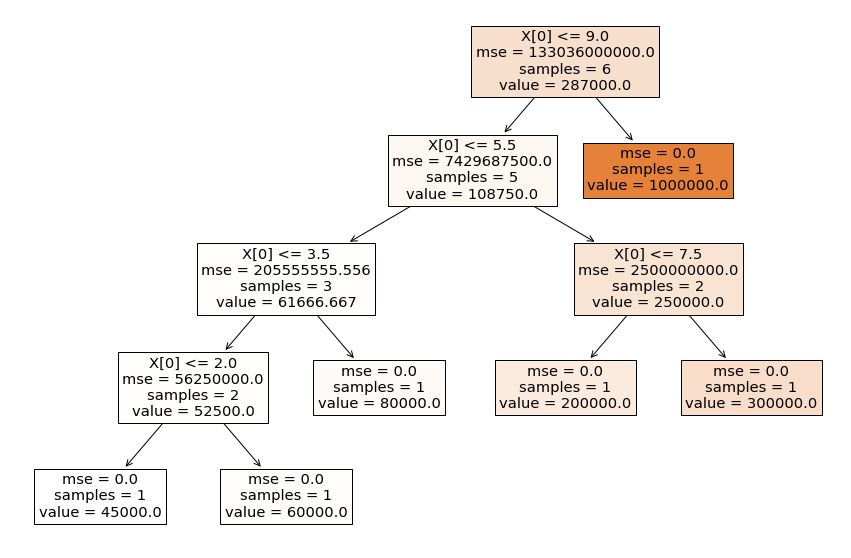

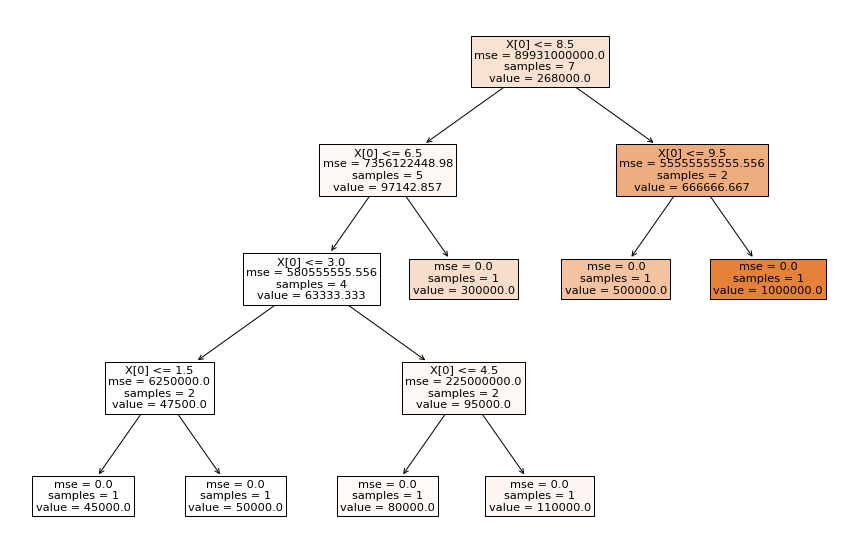

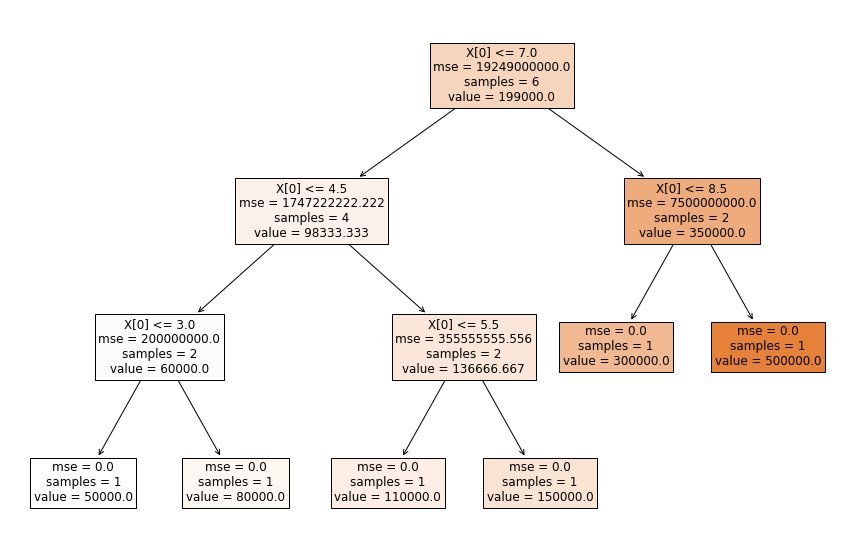

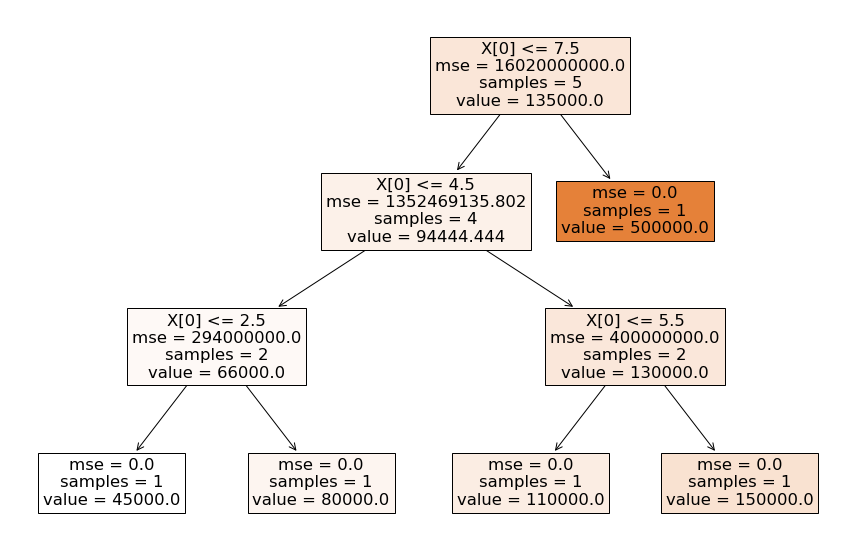

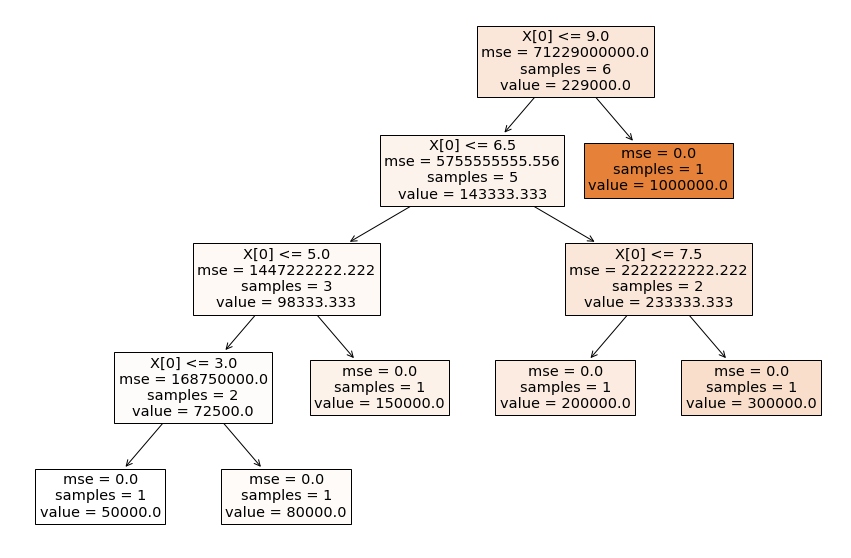

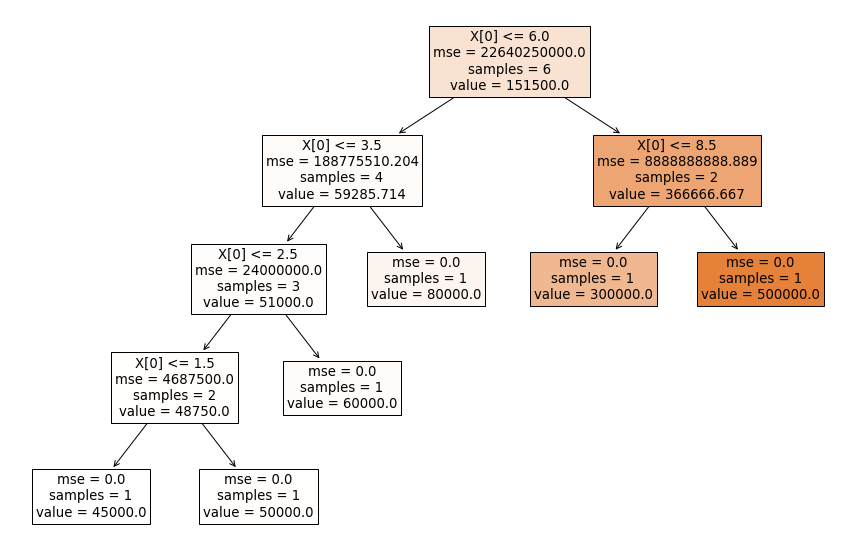

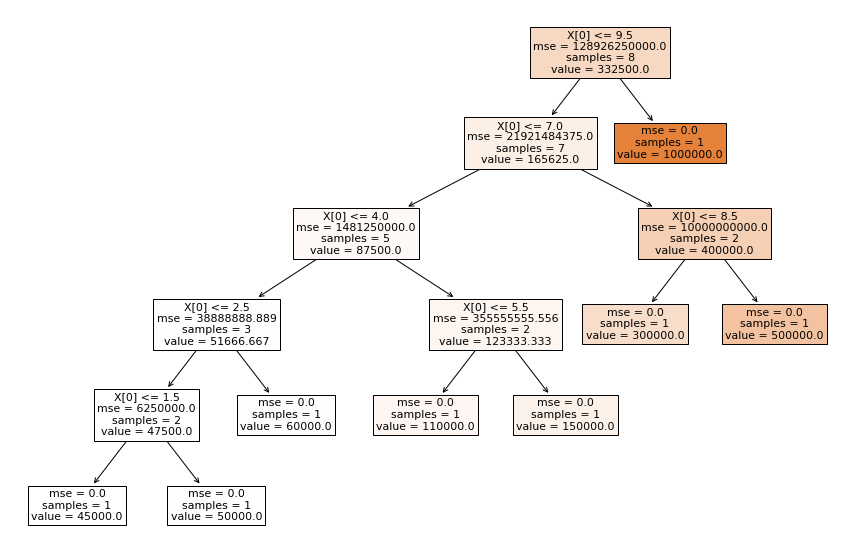

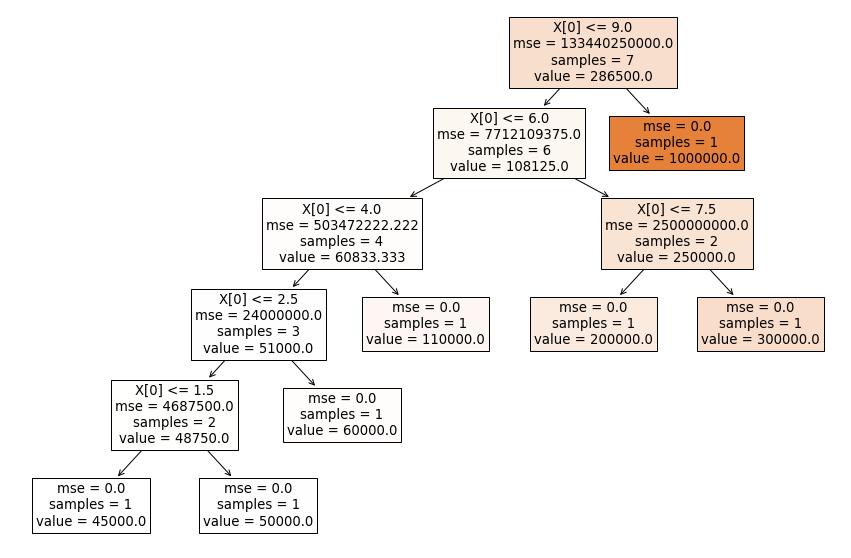

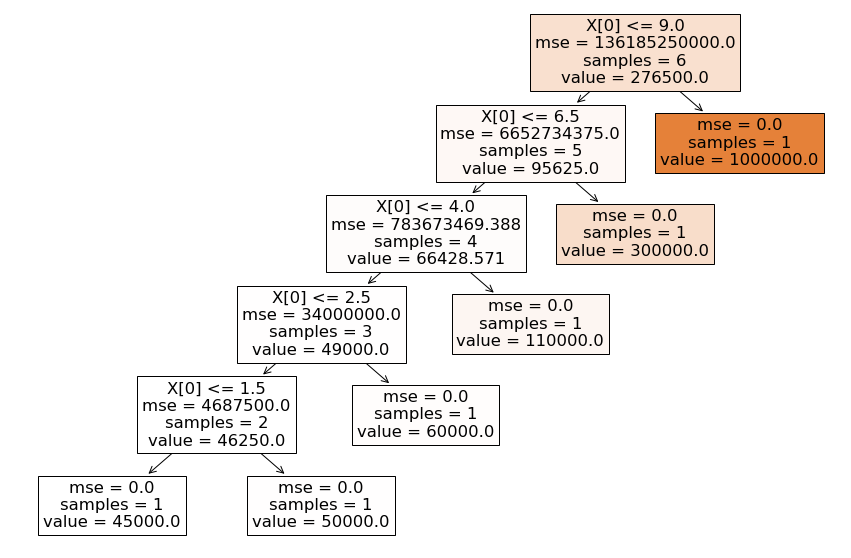

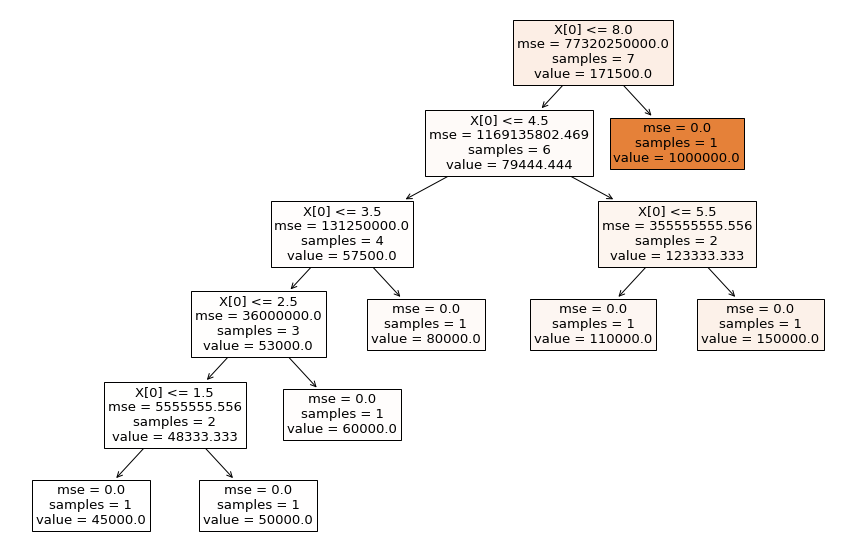

Enter level : 6.5

Mean Squared Error =  321179.07777437806

Accuracy =  100.0


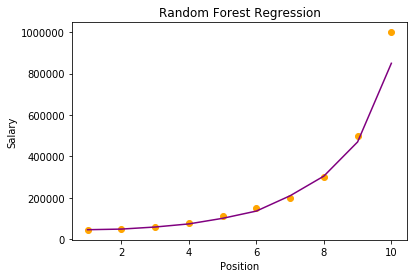

In [10]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import math

#Reading datafile
dataset = pd.read_csv("E:\\MLPython\\Position_Salaries.csv")

#Separating data for x and y axis
x = dataset["Level"].values
y = dataset["Salary"].values

#Reshaping the data 
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

#splitting data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Scale the features
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

#Train the model 
MODEL_RFR = RandomForestRegressor(random_state = 0)
MODEL_RFR.fit(x, y)

#Visualize tree
for i in range(0, len(MODEL_RFR.estimators_)):
    plt.figure(figsize = (15, 10))
    tree.plot_tree(MODEL_RFR.estimators_[i], filled = True)
    plt.show()
    
    

#Drawing predictions from model
level = float(input("Enter level : "))
y_pred = MODEL_RFR.predict([[level]])

#Finding mean squared error and Accuracy of model
MSE = mean_squared_error(y_test, MODEL_RFR.predict(x_test))
print("\nMean Squared Error = ", math.sqrt(MSE))
print("\nAccuracy = ", ((round(MODEL_RFR.score(x, y))) * 100) )

#Visualize the regression curve
plt.scatter(x,y, color='orange')
plt.plot(x, MODEL_RFR.predict(x), color='purple')
plt.title("Random Forest Regression")
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()